In [1]:
# Jupyter magic
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt  # standard Python plotting library

# import the tdt library
import tdt
import pandas as pd

In [2]:
# Must read with "/" not "\
NAc_PATH = 'C:/Users/yongc/Desktop/Synapse/Tanks/RewardTrainingComp-240307-102847/dLight_mPFC-240308-061317'
NAc_data = tdt.read_block(NAc_PATH)

Found Synapse note file: C:/Users/yongc/Desktop/Synapse/Tanks/RewardTrainingComp-240307-102847/dLight_mPFC-240308-061317\Notes.txt
read from t=0s to t=1815.4s


In [3]:
NAc_data.info

tankpath:	'C:\\Users\\yongc\\Desktop\\Synapse\\Tanks\\RewardTrainingComp-240307-102847'
blockname:	'dLight_mPFC-240308-061317'
start_date:	datetime.datetime(2024, 3, 8, 9, 13, 21, 999999)
utc_start_time:	'09:13:21'
stop_date:	datetime.datetime(2024, 3, 8, 9, 43, 37, 396573)
utc_stop_time:	'09:43:37'
duration:	datetime.timedelta(seconds=1815, microseconds=396574)
stream_channel:	0
snip_channel:	0
experiment:	'RewardTrainingComp'
subject:	'dLight_mPFC'
user:	'User'
start:	'6:13:22am 03/08/2024'
stop:	'6:43:37am 03/08/2024'

In [4]:
NAc_data.epocs.PC0_

name:	'PC0/'
onset:	array([   0.        ,   18.61009408,   54.62032384,   54.8503552 ,
         55.49031424,   77.60019456,   91.79021312,   91.92046592,
         92.0403968 ,   92.18015232,   92.32023552,   92.46048256,
         92.62022656,   92.77014016,  110.55038464,  127.47046912,
        127.66035968,  159.93012224,  173.1002368 ,  173.37024512,
        194.86048256,  219.55018752,  225.1702272 ,  225.6502784 ,
        225.88030976,  228.73030656,  228.86023168,  229.03013376,
        229.3202944 ,  240.25055232,  240.49025024,  247.70052096,
        251.38036736,  268.85029888,  278.38038016,  278.4403456 ,
        282.32040448,  284.93037568,  324.31046656,  324.44055552,
        324.80018432,  327.19028224,  327.55040256,  328.95025152,
        329.07034624,  329.20027136,  329.31037184,  329.44029696,
        329.56071936,  334.21033472,  334.64025088,  336.18051072,
        337.34049792,  337.67047168,  338.37039616,  346.390528  ,
        357.85015296,  358.6105344 ,  366.

In [5]:
NAc_data.epocs.PC3_.onset

array([   0.        ,   66.60046848,  146.60026368,  236.60036096,
        316.60015616,  391.60037376,  491.60044544,  586.60143104,
        676.60038144,  756.60034048,  846.60043776,  946.6003456 ,
       1036.60044288, 1156.60079104, 1246.60056064, 1331.60075264,
       1421.60068608, 1516.60085248, 1636.6010368 , 1716.600832  ,
       1810.20131328])

In [6]:
NAc_data.epocs.PC3_.offset

array([   6.58030592,   76.6001152 ,  156.60023808,  246.6004992 ,
        326.60045824,  401.60018432,  501.600256  ,  596.60173312,
        686.60051968,  766.60047872,  856.600576  ,  956.60064768,
       1046.60041728, 1166.6006016 , 1256.60069888, 1341.6005632 ,
       1431.60066048, 1526.60082688, 1646.60084736, 1726.60097024,
                 inf])

In [7]:
df = pd.DataFrame(NAc_data.epocs.PC3_.onset, columns =['timestamps'])

# Basic Plotting

In [8]:
#Jupyter has a bug that requires import of matplotlib outside of cell with matplotlib inline magic to properly apply rcParams

import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 18 # set font size for all figures

# Make some variables up here to so if they change in new recordings you won't have to change everything downstream
ISOS = '_405A' # 405nm channel.
DA = '_465A'

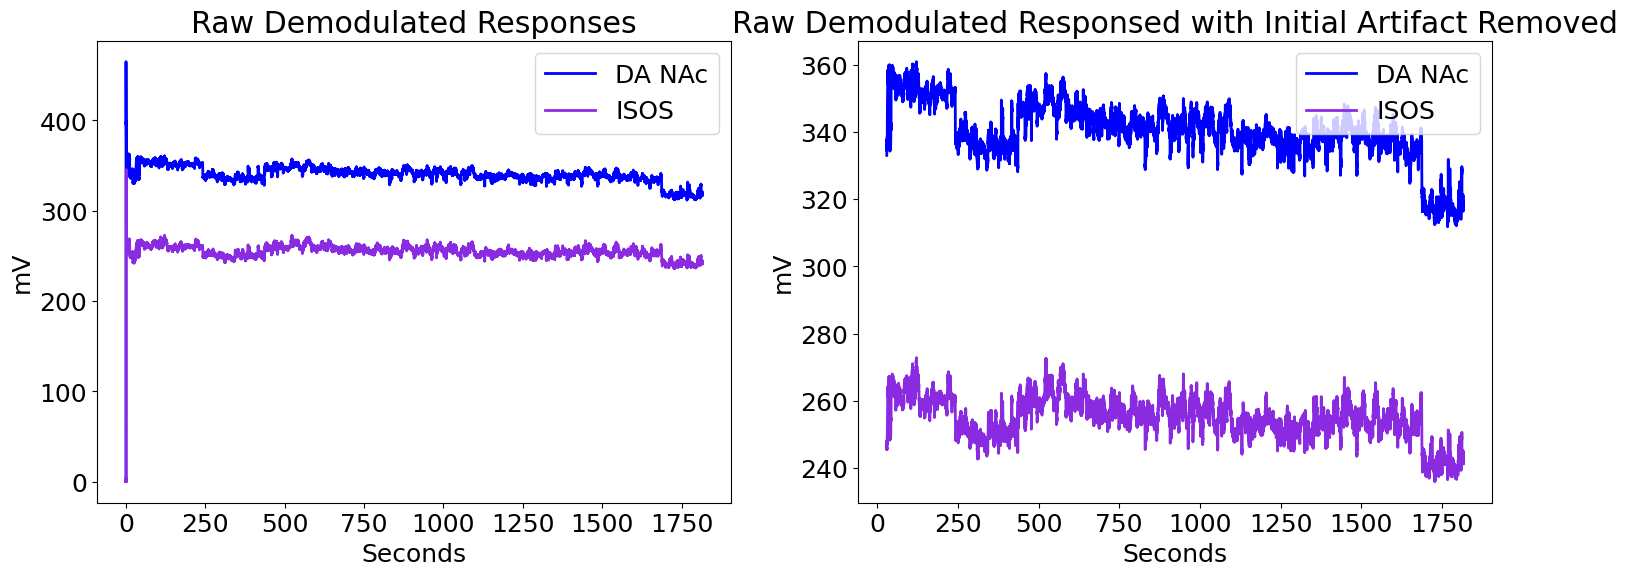

In [9]:
# Make a time array based on the number of samples and sample freq of the demodulated streams
NAc_time = np.linspace(1,len(NAc_data.streams[DA].data), len(NAc_data.streams[DA].data))/NAc_data.streams[DA].fs

# Plot both unprocessed demodulated stream            
fig1 = plt.figure(figsize=(18,6))
ax0 = fig1.add_subplot(121)

# Plotting the traces
p1, = ax0.plot(NAc_time, NAc_data.streams[DA].data, linewidth=2, color='blue', label='DA NAc')
p2, = ax0.plot(NAc_time, NAc_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax0.set_ylabel('mV')
ax0.set_xlabel('Seconds')
ax0.set_title('Raw Demodulated Responses')
ax0.legend(handles=[p1,p2], loc='upper right')

# There is often a large artifact on the onset of LEDs turning on
# Remove data below a set time t
t = 30
inds = np.where(NAc_time>t)
ind = inds[0][0]
NAc_time = NAc_time[ind:] # go from ind to final index
NAc_data.streams[DA].data = NAc_data.streams[DA].data[ind:]
NAc_data.streams[ISOS].data = NAc_data.streams[ISOS].data[ind:]

# Plot again at new time range
ax1 = fig1.add_subplot(122)

# Plotting the traces
p1, = ax1.plot(NAc_time,NAc_data.streams[DA].data, linewidth=2, color='blue', label='DA NAc')
p2, = ax1.plot(NAc_time,NAc_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax1.set_ylabel('mV')
ax1.set_xlabel('Seconds')
ax1.set_title('Raw Demodulated Responsed with Initial Artifact Removed')
ax1.legend(handles=[p1,p2],loc='upper right')

## DownSampling

In [10]:
# Average around every Nth point and downsample Nx
N = 10 # Average every 10 samples into 1 value
F405 = []
F465 = []
for i in range(0, len(NAc_data.streams[DA].data), N):
    F465.append(np.mean(NAc_data.streams[DA].data[i:i+N-1])) # This is the moving window mean
NAc_data.streams[DA].data = F465

for i in range(0, len(NAc_data.streams[ISOS].data), N):
    F405.append(np.mean(NAc_data.streams[ISOS].data[i:i+N-1]))
NAc_data.streams[ISOS].data = F405

#decimate time array to match length of demodulated stream
NAc_time = NAc_time[::N] # go from beginning to end of array in steps on N
NAc_time = NAc_time[:len(NAc_data.streams[DA].data)]

# Detrending and dFF
# Full trace dFF according to Lerner et al. 2015
# https://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline

x = np.array(NAc_data.streams[ISOS].data)
y = np.array(NAc_data.streams[DA].data)
bls = np.polyfit(x, y, 1)
Y_fit_all = np.multiply(bls[0], x) + bls[1]
Y_dFC_all = y - Y_fit_all

dFF = np.multiply(100, np.divide(Y_dFC_all, Y_fit_all))
std_dFF = np.std(dFF)

C:\Users\yongc\AppData\Local\Temp\ipykernel_6436\2369487067.py:24: RankWarning: Polyfit may be poorly conditioned
  bls = np.polyfit(x, y, 1)


In [21]:
NAc_data.epocs.PC0_.offset

array([   6.58030592,   24.3400704 ,   54.74041856,   55.11020544,
         56.03016704,   79.22040832,   91.83019008,   92.00009216,
         92.15033344,   92.29041664,   92.430336  ,   92.59024384,
         92.74015744,   93.67027712,  114.6503168 ,  127.55042304,
        129.98017024,  161.78036736,  173.35042048,  176.08032256,
        214.13019648,  221.30016256,  225.29114112,  225.7002496 ,
        228.40049664,  228.8402432 ,  229.00031488,  229.15039232,
        230.45046272,  240.4401152 ,  247.14018816,  250.06047232,
        252.9001472 ,  270.74035712,  278.42019328,  281.43026176,
        284.85025792,  286.1703168 ,  324.3802624 ,  324.7505408 ,
        326.76052992,  327.2605696 ,  327.610368  ,  329.00022272,
        329.12048128,  329.24024832,  329.37033728,  329.5002624 ,
        334.1402112 ,  334.60043776,  336.15036416,  336.82030592,
        337.58035968,  338.25030144,  339.50040064,  347.70026496,
        358.59070976,  358.8104192 ,  368.90034176,  399.18043

In [20]:
NAc_data.epocs.PC3_.onset

array([   0.        ,   66.60046848,  146.60026368,  236.60036096,
        316.60015616,  391.60037376,  491.60044544,  586.60143104,
        676.60038144,  756.60034048,  846.60043776,  946.6003456 ,
       1036.60044288, 1156.60079104, 1246.60056064, 1331.60075264,
       1421.60068608, 1516.60085248, 1636.6010368 , 1716.600832  ,
       1810.20131328])

### Port Entries

In [11]:
Sound_on = NAc_data.epocs.PC3_.onset
Sound_off = NAc_data.epocs.PC3_.offset

Sound_x = np.append(np.append(NAc_time[0], np.reshape(np.kron([Sound_on, Sound_off],
                   np.array([[1], [1]])).T, [1,-1])[0]), NAc_time[-1])
sz = len(Sound_on)
d = NAc_data.epocs.PC3_.data

# Add zeros to beginning and end of 0,1 value array to match len of LICK_x
Sound_y = np.append(np.append(0,np.reshape(np.vstack([np.zeros(sz),
    d, d, np.zeros(sz)]).T, [1, -1])[0]),0)

y_scale = 10 #adjust according to data needs
y_shift = -20 #scale and shift are just for aesthetics

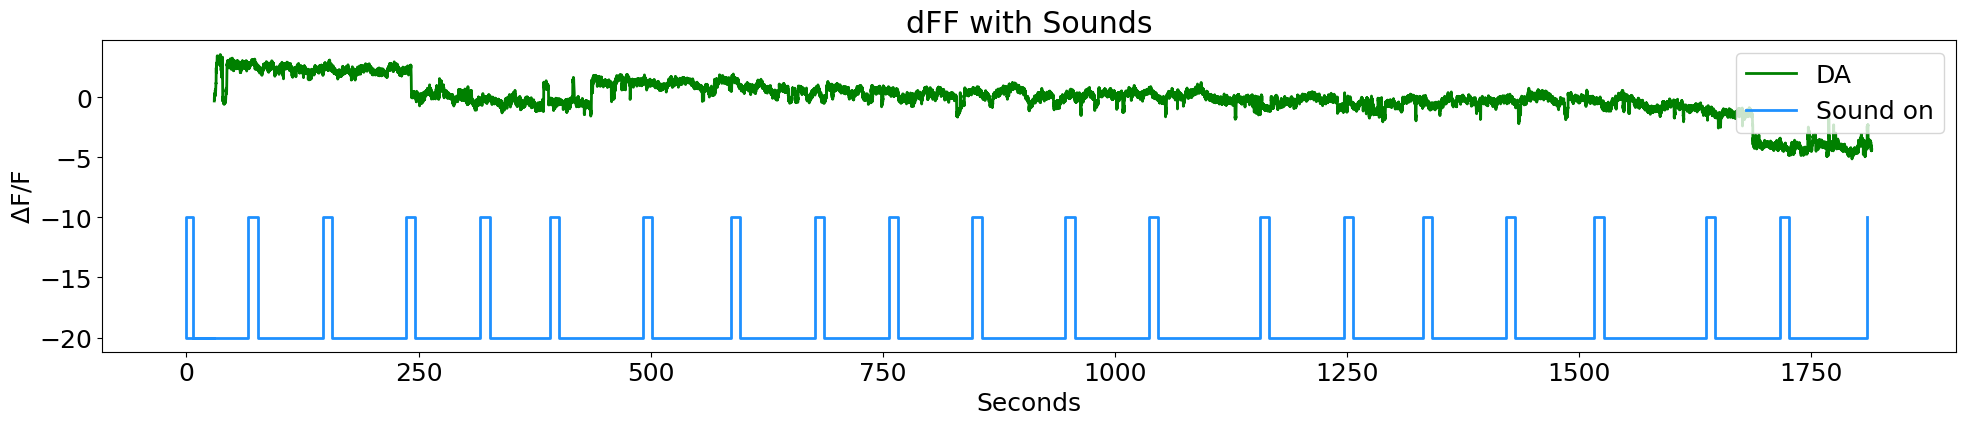

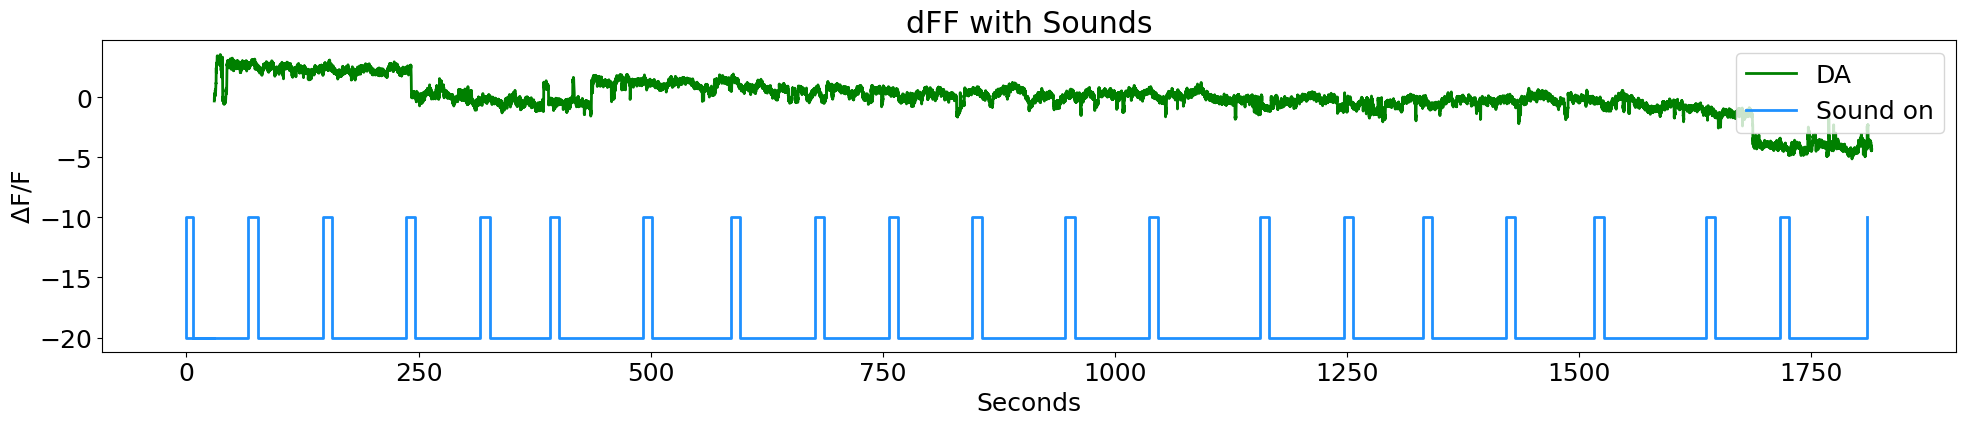

In [12]:
fig2 = plt.figure(figsize=(20,12))
ax3 = fig2.add_subplot(311)
p1, = ax3.plot(NAc_time, dFF, linewidth=2, color='green', label='DA')
p2, = ax3.plot(Sound_x, y_scale*Sound_y+y_shift, linewidth=2, color='dodgerblue', label='Sound on')
ax3.set_ylabel(r'$\Delta$F/F')
ax3.set_xlabel('Seconds')
ax3.set_title('dFF with Sounds')
ax3.legend(handles=[p1, p2], loc='upper right')
fig2.tight_layout()
fig2